In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

# 1. Get US bond data

In [2]:
quandl.ApiConfig.api_key = 'gYL2PmF7subS5YaKyJuj'

In [4]:
UStrs_df = quandl.get('USTREASURY/YIELD')
UStrs_df = UStrs_df.dropna()
UStrs_df.columns = ['TRESY1mo',
                    'TRESY2mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [5]:
UStrs_df.head()

,TRESY1mo,TRESY2mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,,
2018-10-16,2.19,2.22,2.30,2.46,2.66,2.87,2.95,3.02,3.10,3.16,3.26,3.32
2018-10-17,2.20,2.23,2.31,2.47,2.66,2.89,2.97,3.04,3.13,3.19,3.29,3.35
2018-10-18,2.19,2.23,2.32,2.47,2.67,2.87,2.95,3.03,3.11,3.17,3.28,3.36
2018-10-19,2.19,2.23,2.31,2.48,2.67,2.92,2.99,3.05,3.14,3.20,3.31,3.38
2018-10-22,2.18,2.25,2.34,2.49,2.68,2.92,2.99,3.05,3.13,3.20,3.31,3.38


In [8]:
UStrs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2018-10-16 to 2022-09-02
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TRESY1mo  972 non-null    float64
 1   TRESY2mo  972 non-null    float64
 2   TRESY3mo  972 non-null    float64
 3   TRESY6mo  972 non-null    float64
 4   TRESY1y   972 non-null    float64
 5   TRESY2y   972 non-null    float64
 6   TRESY3y   972 non-null    float64
 7   TRESY5y   972 non-null    float64
 8   TRESY7y   972 non-null    float64
 9   TRESY10y  972 non-null    float64
 10  TRESY20y  972 non-null    float64
 11  TRESY30y  972 non-null    float64
dtypes: float64(12)
memory usage: 98.7 KB


In [42]:
UStrs_df.describe()

,TRESY1mo,TRESY2mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000
mean,0.9104,0.9508,0.9789,1.0718,1.1404,1.2352,1.3122,1.4567,1.6276,1.7587,2.1551,2.2505
std,0.9882,0.9991,1.0062,1.0533,1.0746,1.0639,1.0289,0.9232,0.8375,0.7641,0.6821,0.6010
min,0.0000,0.0000,0.0000,0.0200,0.0400,0.0900,0.1000,0.1900,0.3600,0.5200,0.8700,0.9900
25%,0.0600,0.0700,0.0700,0.0900,0.1200,0.1700,0.3100,0.6675,0.9675,1.1975,1.7575,1.8500
50%,0.1400,0.2150,0.3400,0.5950,0.8900,1.1800,1.3450,1.4000,1.5000,1.6500,2.1000,2.2100
75%,2.0625,2.0450,2.0125,2.0800,2.0300,2.2800,2.2700,2.2925,2.3825,2.4325,2.6825,2.8225
max,2.5300,2.8000,2.9700,3.3400,3.5100,3.5100,3.6000,3.6100,3.6000,3.4900,3.7200,3.4600


# 2. Visualization of raw data

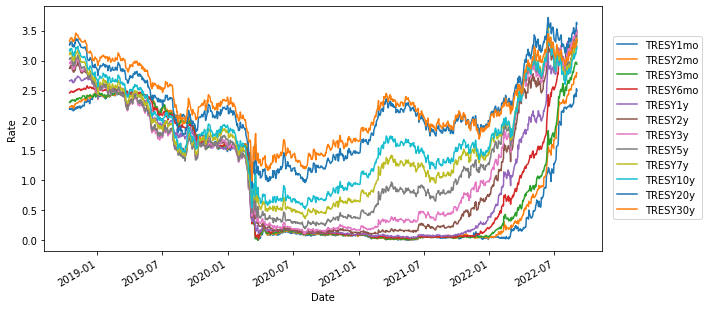

In [9]:
UStrs_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

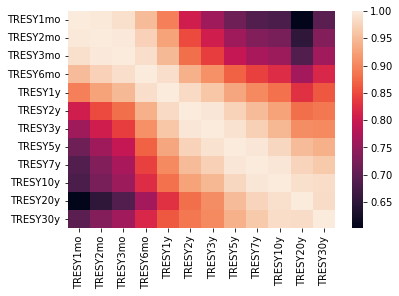

In [10]:
sns.heatmap(UStrs_df.corr())
plt.show()

*Correlation matrix btw each maturities

# 3. Produce Primary Components

In [125]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca.fit(UStrs_df)

PCA(n_components=3)

*'n_components means' the number of PCs which we use. 

*As illustrated later, as relevant literatures indicate, 3 PCs explain no less than 95% of the movement of yield curves.

# 4. What PCs consists of ? 

In [131]:
factor_loading = pd.DataFrame(pca.components_,
             columns=['1m',
                    '2m',
                    '3m', 
                    '6m',
                    '1y',
                    '2y',
                    '3y',
                    '5y',
                    '7y',
                    '10y',
                    '20y',
                    '30y'],
             index=[f'PC{i+1}' for i in range(pca.n_components_)])

In [132]:
factor_loading = factor_loading.transpose()

In [133]:
factor_loading.head(12)

,PC1,PC2,PC3
1m,0.2885,-0.4528,-0.2560
2m,0.3019,-0.3958,-0.1660
3m,0.3108,-0.3455,-0.0921
6m,0.3373,-0.2135,0.1027
1y,0.3491,-0.0511,0.2828
2y,0.3417,0.1413,0.4152
3y,0.3259,0.2290,0.3685
5y,0.2870,0.2956,0.0856
7y,0.2558,0.3077,-0.1306
10y,0.2302,0.2859,-0.3261


*Each contribution of each maturities to the PCs

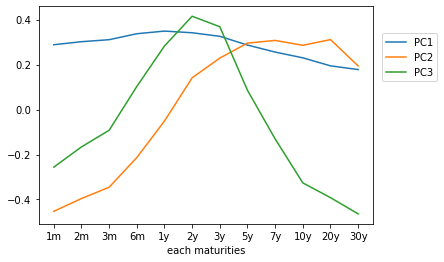

In [134]:
plt.plot(factor_loading)
plt.xlabel('each maturities')
plt.legend(factor_loading, bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

*Factor loading chart. Relevant literature interprets each PC as follows;

*PC1: General level of yield curve (because each yield has equally contributed PC1.)

*PC2: Slope of yield curve (because the short end and the long end zone move opposite direction)

*PC3: Curvature of yield zone (??)

# 5. To what extent the PCs explain the movement of the yield curve ?

In [135]:
expl_varr = pd.DataFrame(pca.explained_variance_ratio_, columns=['Contribution'], index = ['PC1','PC2','PC3'] )

In [136]:
expl_varr.head()

,Contribution
PC1,0.8969
PC2,0.0878
PC3,0.0128


*How much ratio each PC explains about the the movement of yield curves. 

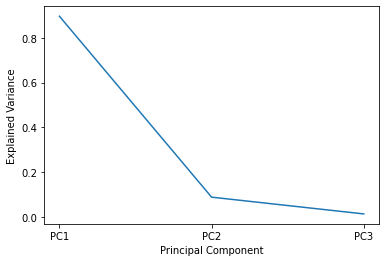

In [137]:
plt.plot(expl_varr)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

# 6. Reconstruct the raw data by PCs

In [138]:
vals = pca.transform(UStrs_df)

In [139]:
pd.options.display.float_format = '{:.4f}'.format
vals_df = pd.DataFrame(vals, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
vals_df['date'] = UStrs_df.index
vals_df.set_index('date', inplace=True)

vals_df.head()

,PC1,PC2,PC3
date,,,
2018-10-16,4.8074,0.5612,-0.2505
2018-10-17,4.8646,0.5934,-0.2766
2018-10-18,4.8422,0.5706,-0.2802
2018-10-19,4.9023,0.6250,-0.2758
2018-10-22,4.9191,0.6056,-0.2742


*Raw data has been transformed as expressed by PCs

*It is difficult to get practical interpretation from each figure.

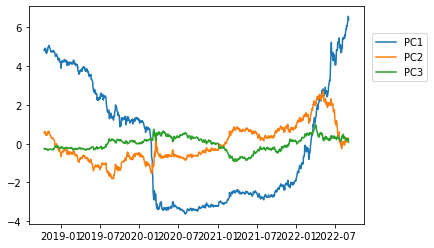

In [140]:
plt.plot(vals_df)
plt.legend(vals_df, bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

# 7. Reconstruct the yield curve 

# 8. Calculate residual (= gap between original data and reconstructed one) 